Saving Blinkit.csv to Blinkit.csv
(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


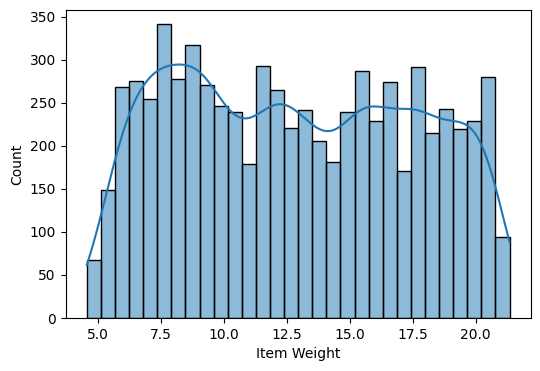

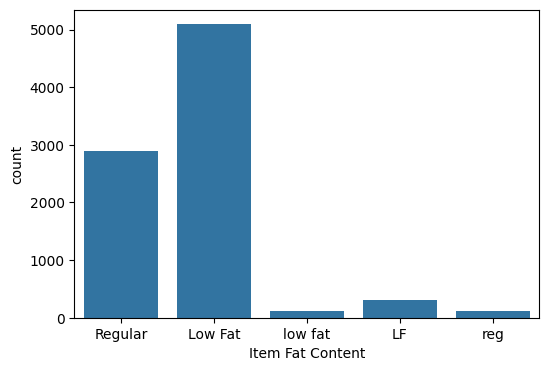

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
 avant normalisation ['Regular' 'Low Fat' 'low fat' 'LF' 'reg']
Après normalisation ['Regular' 'Low Fat']


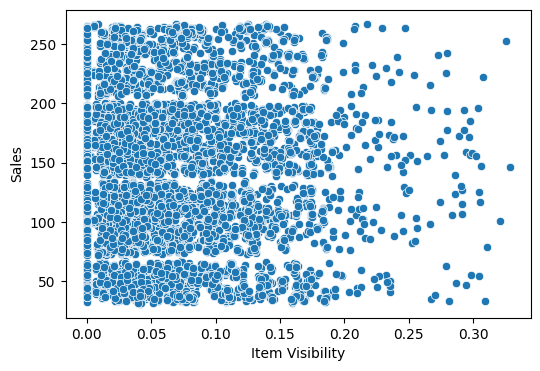

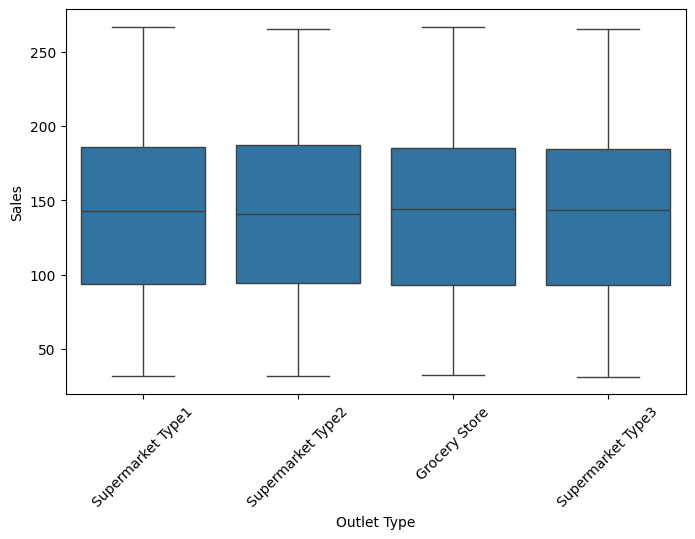

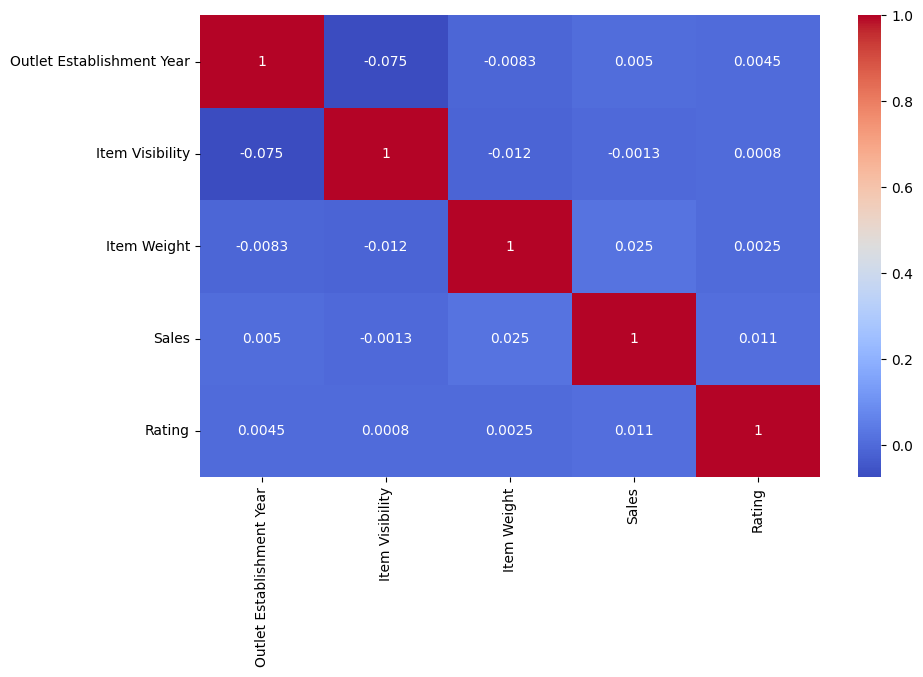

colonnes categorielle : ['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type']
  Outlet Size  Outlet Size Encoded
0      Medium                    1
1      Medium                    1
2       Small                    2
3        High                    0
4       Small                    2
(8523, 1594)


,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating,Outlet Size Encoded,Item Fat Content_Regular,Item Identifier_DRA24,Item Identifier_DRA59,Item Identifier_DRB01,...,Outlet Identifier_OUT027,Outlet Identifier_OUT035,Outlet Identifier_OUT045,Outlet Identifier_OUT046,Outlet Identifier_OUT049,Outlet Location Type_Tier 2,Outlet Location Type_Tier 3,Outlet Type_Supermarket Type1,Outlet Type_Supermarket Type2,Outlet Type_Supermarket Type3
0,2012,0.100014,15.10,145.4786,5.0,1,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,2022,0.008596,11.80,115.3492,5.0,1,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,2010,0.025896,13.85,165.0210,5.0,2,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,2000,0.042278,12.15,126.5046,5.0,0,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4,2015,0.033970,19.60,55.1614,5.0,2,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False


In [2]:
# @title
#Blinkit v2
# Installer les bibliothèques
# !pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Charger le dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Blinkit.csv")
# Aperçu des données
print(df.shape)
df.head(8)
df.tail(5)
# Module 2 : Analyse initiale
df.info()
## Valeurs manquantes
df.isnull().sum()
df.describe()
df.columns

## Module 3 : Exploration univariée
## Poids des articles
plt.figure(figsize=(6,4))
sns.histplot(df['Item Weight'], bins=30 , kde=True)
plt.show()
#Contenu en graisse des articles
plt.figure(figsize=(6,4))
sns.countplot(x='Item Fat Content', data=df)
plt.show()

print(df['Item Fat Content'].value_counts())

# Module 4 : Nettoyage des données  Normalisation de Item_Fat_Content"""
# Normalisation de  Item_Fat_Content

print(" avant normalisation", df['Item Fat Content'].unique())
# Harmoniser les catégories
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
print("Après normalisation", df['Item Fat Content'].unique())

# Valeurs manquantes dans Item_Weight
# Remplacer par la mediane

df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())
# Remplacer par la valeur la plus fréquente (mode)
df['Outlet Size'] = df['Outlet Size'].fillna(df['Outlet Size'].mode()[0])
# Vérifier les valeurs manquantes
df.isnull().sum()

# Module 5 : Exploration bivariée
# Relation MRP (prix max) et ventes
plt.figure(figsize=(6,4))
sns.scatterplot(x='Item Visibility', y='Sales', data=df )
plt.show()
# Boxplot des ventes selon le type d’outlet
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet Type', y='Sales', data=df)
plt.xticks(rotation=45)
plt.show()
# Module 6 : Analyse des corrélations
# Code corrigé (numérique uniquement)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Module 7 : Préparation pour Machine Learning
# Encodage des variables catégorielles

# Colonnes catégorielles
cat_cols = df.select_dtypes(include='object').columns
print("colonnes categorielle :",cat_cols.tolist())

# 2️⃣ Label Encoding (Encodage numérique simple)
#Chaque catégorie est remplacée par un entier (utile pour des colonnes ordinales comme Outlet Size = Small, Medium, High).

# Example with Outlet Size
le = LabelEncoder()
df['Outlet Size Encoded'] = le.fit_transform(df['Outlet Size'])
print(df[['Outlet Size', 'Outlet Size Encoded']].head())

# 1️⃣ One-Hot Encoding (pour les colonnes non ordinales)
df_encoded = pd.get_dummies(df.drop('Outlet Size', axis=1), drop_first=True)
print(df_encoded.shape)
df_encoded.head()

In [7]:
"""Définir les Caractéristiques (X) et la Variable Cible (y) nous séparons notre ensemble de données en deux parties :

X (Features) : Ce sont les colonnes que nous utiliserons pour prédire la variable cible. toutes les colonnes de df_encoded sauf 'Sales'.
y (Target) : la variable que nous voulons prédire, dans ce cas, les 'Sales'."""

X = df_encoded.drop('Sales',axis=1)
Y = df_encoded['Sales']
print("Forme des caractéristiques (X):", X.shape)
print("Forme des features (Y):", Y.shape)




Forme des caractéristiques (X): (8523, 1593)
Forme des features (Y): (8523,)


In [4]:
"""Diviser les Données en Ensembles d'Entraînement et de Test
  Pour évaluer la performance de notre modèle de manière réaliste, nous divisons les données en deux sous-ensembles :

Ensemble d'entraînement (X_train, y_train) , Ensemble de test (X_test, y_test) :
Nous utilisons train_test_split de sklearn.model_selection pour cette division.
test_size spécifie la proportion de données à inclure dans l'ensemble de test (ici 20%),
et random_state assure la reproductibilité de la division."""

from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Forme de l'ensemble d'entraînement (X_train):", X_train.shape)
print("Forme de l'ensemble de test (X_test):", X_test.shape)
print("Forme de l'ensemble d'entraînement (Y_train):", y_train.shape)
print("Forme de l'ensemble de test (X_test):", y_test.shape)


Forme de l'ensemble d'entraînement (X_train): (6818, 1593)
Forme de l'ensemble de test (X_test): (1705, 1593)
Forme de l'ensemble d'entraînement (Y_train): (6818,)
Forme de l'ensemble de test (X_test): (1705,)


In [5]:
"""Entraîner un Modèle de Machine Learning (Exemple avec la Régression Linéaire)
utiliser un modèle de Régression Linéaire simple pour commencer.
Ce modèle essaie de trouver une relation linéaire entre les caractéristiques (X) et la variable cible (y).
Nous importons LinearRegression de sklearn.linear_model, créons une instance du modèle,
puis l'entraînons en utilisant la méthode fit() sur les données d'entraînement."""

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Modèle de Régression Linéaire entraîné avec succès!")


Modèle de Régression Linéaire entraîné avec succès!


In [8]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Afficher les résultats
# Afficher les résultats
print(f"Erreur Quadratique Moyenne (MSE) : {mse:.2f}")
print(f"Racine Carrée de l'Erreur Quadratique Moyenne (RMSE) : {rmse:.2f}")
print(f"Coefficient de Détermination (R-squared) : {r2:.2f}")

Erreur Quadratique Moyenne (MSE) : 16.73
Racine Carrée de l'Erreur Quadratique Moyenne (RMSE) : 4.09
Coefficient de Détermination (R-squared) : 1.00
